In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data_set = pd.read_csv('/content/insurance.csv')


In [ ]:
data_set.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data_set.shape


(1338, 7)

In [ ]:
data_set.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Axes: >

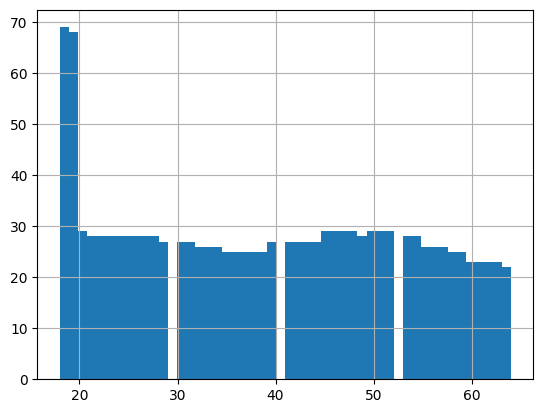

In [ ]:
data_set['age'].hist(bins = 50)

In [ ]:
data_set['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [ ]:
data_set['age'].max()

64

In [ ]:
data_set['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
data_set['bmi'].describe()

count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<Axes: >

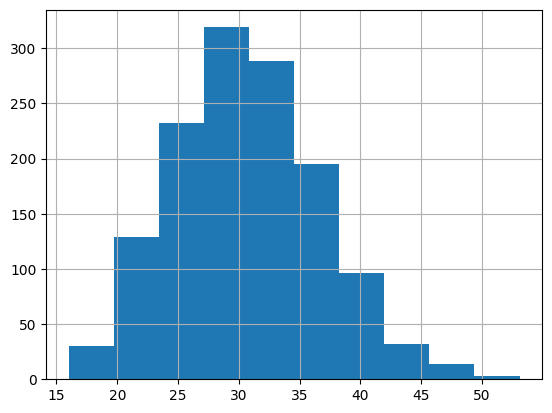

In [ ]:
data_set['bmi'].hist()

<Axes: >

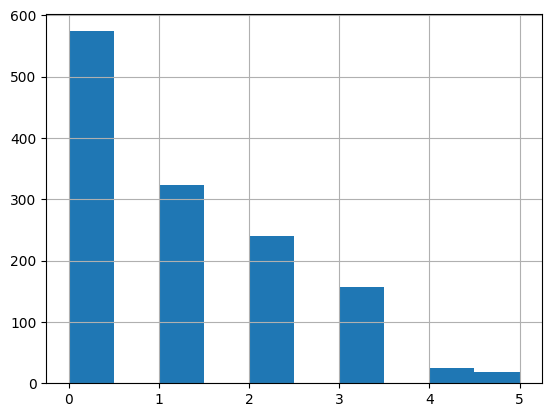

In [ ]:
data_set['children'].hist()

In [ ]:
data_set.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

<Axes: >

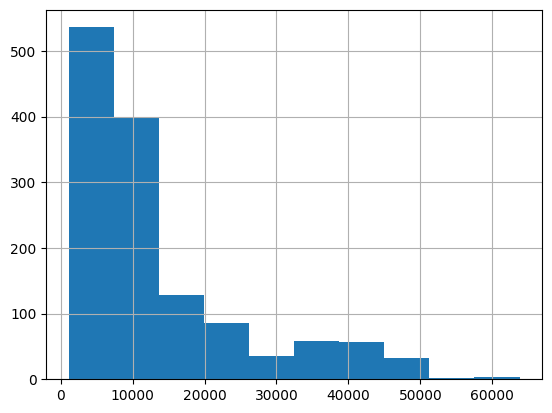

In [ ]:
data_set['expenses'].hist()

In [ ]:
data_set['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
data_set['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
data_set['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

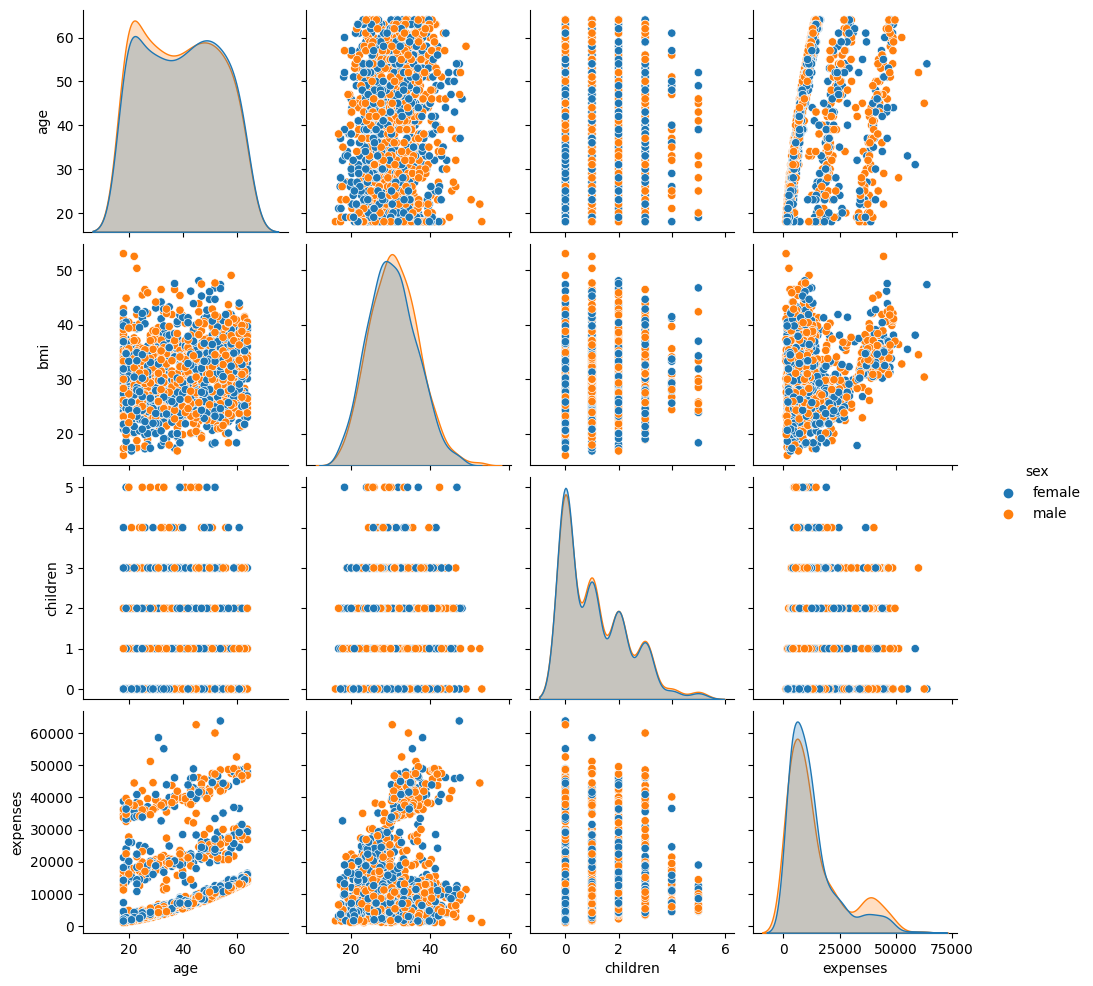

In [ ]:
sns.pairplot(data_set, hue = 'sex')

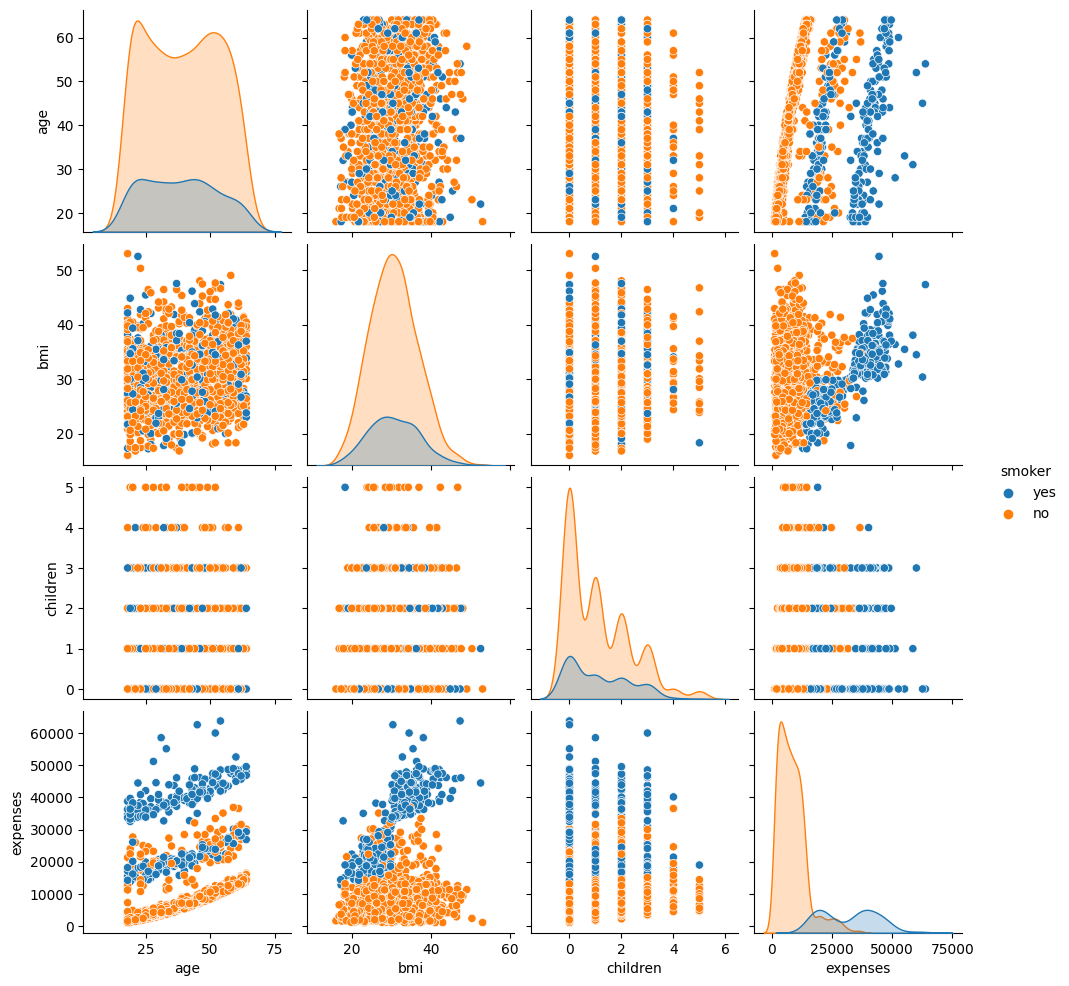

In [ ]:
sns.pairplot(data_set, hue = 'smoker')

In [ ]:
data_set['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
data_set['sex'] = data_set['sex'].map({'male': 1, 'female': 0})
data_set['smoker'] = data_set['smoker'].map({'yes': 1, 'no': 0})
data_set['region'] = data_set['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})


In [ ]:
data_set.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


<Axes: >

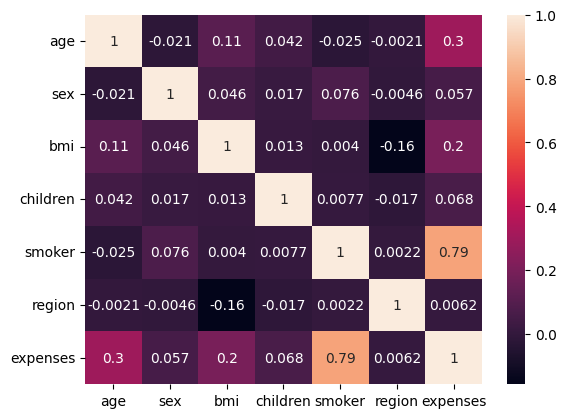

In [ ]:
corr = data_set.corr()

sns.heatmap(corr, annot = True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = ['age', 'bmi', 'children', 'region']
scaler = StandardScaler()

data_set[scale] = scaler.fit_transform(data_set[scale])

In [ ]:
data_set.head()

,age,sex,bmi,children,smoker,region,expenses
0,-1.438764,0,-0.453646,-0.908614,1,-1.343905,16884.92
1,-1.509965,1,0.514186,-0.078767,0,-0.438495,1725.55
2,-0.797954,1,0.382954,1.580926,0,-0.438495,4449.46
3,-0.441948,1,-1.306650,-0.908614,0,0.466915,21984.47
4,-0.513149,1,-0.289606,-0.908614,0,0.466915,3866.86


In [ ]:
y =data_set['expenses']
x = data_set.drop(columns = 'expenses')


In [ ]:
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453646,-0.908614,1,-1.343905
1,-1.509965,1,0.514186,-0.078767,0,-0.438495
2,-0.797954,1,0.382954,1.580926,0,-0.438495
3,-0.441948,1,-1.306650,-0.908614,0,0.466915
4,-0.513149,1,-0.289606,-0.908614,0,0.466915


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 100)


In [ ]:
x_train.shape

(1070, 6)

In [ ]:
x_test.shape

(268, 6)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)


LinearRegression()

In [ ]:
print(lr.intercept_)
print(lr.coef_)


8446.706509952943
[3.70794440e+03 1.32803930e+01 1.88264907e+03 5.72012276e+02
 2.34770995e+04 4.24965620e+02]


In [ ]:
x_test.head()

,age,sex,bmi,children,smoker,region
12,-1.153959,1,0.612609,-0.908614,0,-1.343905
306,-0.797954,0,-0.519261,0.751079,0,-1.343905
318,0.341265,0,-0.502857,-0.908614,0,0.466915
815,-1.367563,0,0.136896,-0.908614,0,-0.438495
157,-1.509965,1,-0.896552,-0.908614,1,1.372326


In [ ]:
y_pred = lr.predict(x_test)

y_pred

array([ 4243.64610003,  4368.86546388,  8444.0807066 ,  2927.50161866,
       24713.77943675, 37353.0222474 , 15275.91844826,  3132.48895947,
       29148.65160146, 16280.87765014, 15484.98863088,  4938.41407173,
       11605.15302114,  4752.42309752,  9229.47081973, 31368.96457869,
       11811.19498615, 12695.96823697,  6682.01876306, 18408.54213787,
       14281.16635195,  2696.49260627,  6806.6357045 , 31814.08851085,
       14051.85334609, 32591.19717351,  7026.82909339, 39986.49070486,
       31710.93286168, 13521.79863525, 18474.30818672,  2863.20149444,
       39582.00191496, 26721.16337596,  8291.45442828, 12126.14754826,
        8310.01150683, 32984.10753068,  4497.44904907, 38158.93522665,
        7593.33585944, 13006.4587964 ,  5468.27465031,  8356.00128326,
        1192.51668135,  5292.66869839,  5450.09484961,  4078.17799193,
        2668.73000016, 11124.62412928, 17381.49734358,  7248.20881175,
        5651.37053097,  8800.23142577,  6910.90160104, 13849.73949824,
      

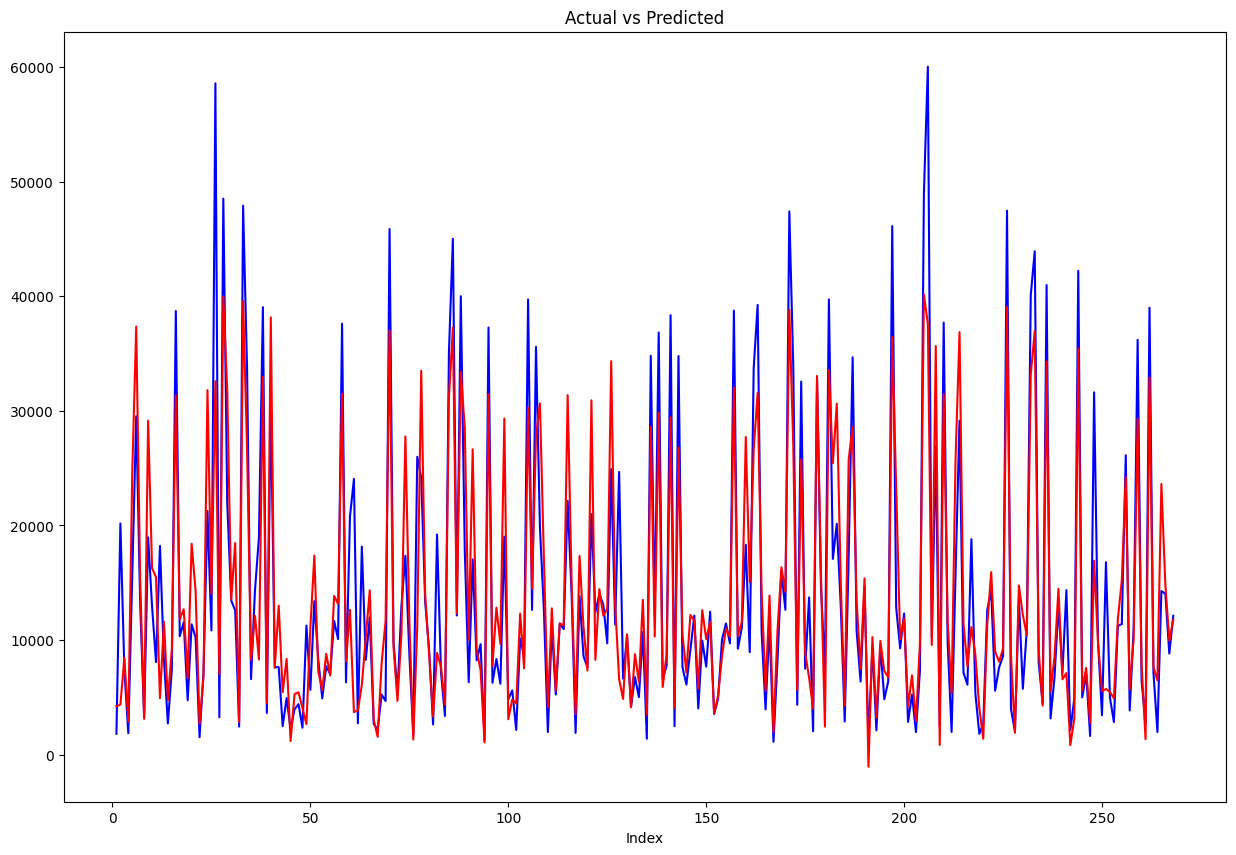

In [ ]:
plt.figure(figsize = (15, 10))

c = [i for i in range(1, len(x_test.index) + 1, 1)]

plt.plot(c, y_test, color = 'blue', linestyle = '-')
plt.plot(c, y_pred, color = 'red', linestyle = '-')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('Coefficient of determination: ', r2)


Mean squared error:  32264561.376801677
Mean absolute error:  3920.321898739806
Coefficient of determination:  0.7942417215169689


In [ ]:
data_set['expenses'].describe()


count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64